<div class="alert alert-block alert-info">
    <center><h1> Data Formatting & Labelling </h1></center>
</div>

# Sections

- **[1. BCI Competition IV 2a](#1.-BCI-Competition-IV-2a)** 
- **[2. BCI Competition IV 2b](#2.-BCI-Competition-IV-2b)** 
- **[3. BCI Competition III a](#3.-BCI-Competition-III-a)**
- **[4. Our Competition Dataset](#4.-Our-Competition-Dataset)**
- **[5. HGD](#5.-HGD)**

**Dependencies:**
- mne (0.18.2)

**Datasets download links:**
- **BCI IV 2a:** [NPZ](https://github.com/bregydoc/bcidatasetIV2a) 
[GDF](http://bbci.de/competition/iv/index.html#download) 
[MAT](http://bnci-horizon-2020.eu/database/data-sets)
[Test labels](http://www.bbci.de/competition/iv/results/index.html#labels)
- **BCI IV 2b:** [GDF](http://bbci.de/competition/iv/index.html#download)
- **BCI III:** [GDF](http://bbci.de/competition/iv/index.html#download)

**Folder structure:**
- Datasets
    - BCI_IV_2a
        - gdf
            - train: all A0*T.gdf files
            - test: 
                - All A0*E.gdf files
                - labels: all true labels files
- Notebooks

In [20]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import mne
import re
mne.set_log_level('WARNING')
import glob, os
import numpy as np
from ipywidgets import interact 
import scipy.io
from visualization_functions.signal_visualizers import temporal_plot, wavelets_plot, stft_plot
from visualization_functions.signal_visualizers import visual_analysis
from utils.utils import load_Xy, inspect_mne

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. BCI Competition IV 2a
[Back to top](#Sections)

**[BCI Competition IV 2a](http://bbci.de/competition/iv/index.html#download):**
- **MI paradigms:** Left - Right - Feet - Tongue
- **Subjects:**  9 pilots
- **Trials per session:** 288 trials (72 for each class)
- **Preprocessing:** Bandpass filter [0.5, 100] Hz + Notch filtering
- **Sample frequency:** 250 Hz
- **Electrodes:** 22 EEG + 3 EOG
- **Useful timewindow:** 2s before cue - 5.5s after cue (full trial is 7.5s)

### Inspecting raw data

In [236]:
pilot_idx = 1
mode = 'train' # {'train', 'test'}
data_path = '../../Datasets/BCI_IV_2a/gdf/{}/'.format(mode)
filepath = glob.glob(data_path + '/*{}*.gdf'.format(pilot_idx))[0]

raw = inspect_mne(filepath, plot_mne=False, load=True)

Inspecting {} ../../Datasets/BCI_IV_2a/gdf/train/A01T.gdf


/home/fdebrain/anaconda3/envs/thesis/lib/python3.6/site-packages/mne/io/edf/edf.py:1059: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
../utils/utils.py:33: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_gdf(path, preload=True) if filetype=='gdf' else mne.io.read_raw_brainvision(path, preload=True)


Sampling frequency:  250.0
Number of channels:  25
Channel names:  ['EEG-Fz', 'EEG-0', 'EEG-1', 'EEG-2', 'EEG-3', 'EEG-4', 'EEG-5', 'EEG-C3', 'EEG-6', 'EEG-Cz', 'EEG-7', 'EEG-C4', 'EEG-8', 'EEG-9', 'EEG-10', 'EEG-11', 'EEG-12', 'EEG-13', 'EEG-14', 'EEG-Pz', 'EEG-15', 'EEG-16', 'EOG-left', 'EOG-central', 'EOG-right']
	 1: 15.00
	 2: 288.00
	 3: 1.00
	 4: 72.00
	 5: 72.00
	 6: 72.00
	 7: 72.00
	 8: 1.00
	 9: 1.00
	 10: 9.00
Rejection of whole trial 1
Start of Trial, Trigger at t=0s 2
Unknown 3
class1, Left hand - cue onset (BCI experiment) 4
class2, Right hand - cue onset (BCI experiment) 5
class3, Foot, towards Right - cue onset (BCI experiment) 6
class4, Tongue - cue onset (BCI experiment) 7
eeg:Idling EEG - eyes closed 8
eeg:Idling EEG - eyes open 9
start of a new segment (after a break) 10


### Formatting data into .npz

In [ ]:
from formatting_functions.formatter import FormatterGDF

data_path = '../../Datasets/BCI_IV_2a/'
pre = 2.
post = 5.5
remove_ch = ['EOG-left', 'EOG-central', 'EOG-right']
ch_list = None
label_idx = [4,5,6,7]
multisession = False

for mode in ['train', 'test']:
    formatter = FormatterGDF(root=data_path + 'gdf/', save_path=data_path,
                             labels_idx=label_idx, ch_list=ch_list, remove_ch=remove_ch, 
                             pre=pre, post=post, mode=mode, save=True, save_folder='formatted_raw', 
                             resample=False, preprocess=False, multisession=multisession, multithread=True,
                             save_as_trial=False)
formatter.run()

# Alternative
# from formatting_functions.formatter import FormatterNPZ

# remove_ch = None
# ch_list = None
# label_idx = [769,770,771,772]

# for mode in ['train', 'test']:
#     formatter = FormatterNPZ(root=data_path +'npz/'', save_path=data_path,
#                              labels_idx=label_idx, ch_list=ch_list, remove_ch=remove_ch, fs=250, 
#                              pre=pre, post=post, mode=mode, save=False, save_folder='formatted_npz_raw')
#     form.run()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


### Inspecting formatted data
Extract information from raw gdf files

Loading  ../../Datasets/BCI_IV_2a/formatted_raw/train/train1.npz
X shape: (288, 22, 1875) - y shape: (288,)
Labels:  [0 1 2 3]
Label 0 - 72 trials
Label 1 - 72 trials
Label 2 - 72 trials
Label 3 - 72 trials


<IPython.core.display.Javascript object>


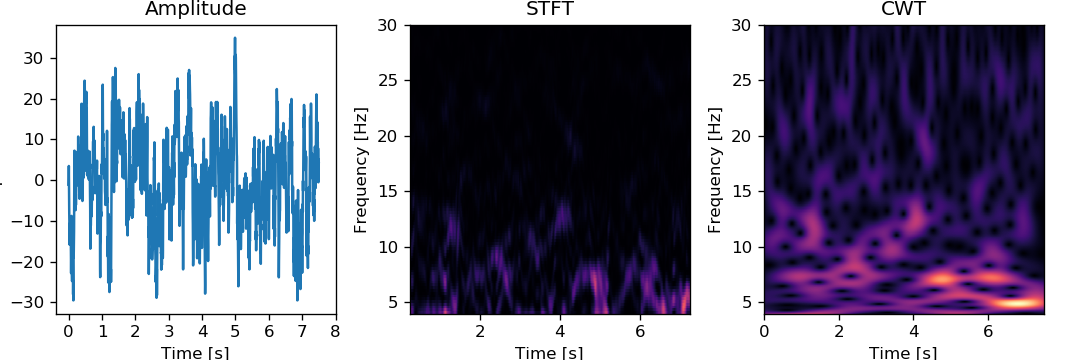

interactive(children=(IntSlider(value=0, description='trial_idx', max=287), IntSlider(value=0, description='ch…

In [182]:
%matplotlib notebook

# Loading output
pilot_idx = 1
mode = 'train' # {'train', 'test'}
path = '../../Datasets/BCI_IV_2a/formatted_raw/{}/{}{}.npz'.format(mode, mode, pilot_idx)
X,y = load_Xy(path, verbose=1)

# Plot signal
visual_analysis(X)

## 2. BCI Competition IV 2b
[Back to top](#Sections)

**[BCI Competition IV 2b](http://bbci.de/competition/iv/index.html#download):**
- **MI paradigms:** Left - Right
- **Subjects:**  9 pilots
- **Trials per session:** 40 trials per run (20 for each class, train = 10 runs, test = 8 runs)
- **Preprocessing:** Bandpass filter [0.5, 100] Hz + Notch filtering
- **Sample frequency:** 250 Hz
- **Electrodes:** 3 EEG + 3 EOG
- **Useful timewindow:** 3s before cue - 5.5s after cue (full trial is 8.5s)

Session 3 has different labels ! ([4,5] instead of [3,4])

### Inspecting raw data

In [172]:
pilot_idx = 1
session_idx = 1
mode = 'train' # {'train', 'test'}
data_path = '../../Datasets/BCI_IV_2b/gdf/{}/'.format(mode)
filepath = glob.glob(data_path + '/B0{}0{}*.gdf'.format(pilot_idx, session_idx))[0]

raw = inspect_mne(filepath, plot_mne=False, load=True)

Inspecting {} ../../Datasets/BCI_IV_2b/gdf/train/B0101T.gdf


/home/fdebrain/anaconda3/envs/thesis/lib/python3.6/site-packages/mne/io/edf/edf.py:1059: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]


Sampling frequency:  250.0
Number of channels:  6
Channel names:  ['EEG:C3', 'EEG:Cz', 'EEG:C4', 'EOG:ch01', 'EOG:ch02', 'EOG:ch03']
	 1: 18.00
	 2: 120.00
	 3: 60.00
	 4: 60.00
	 5: 1.00
	 6: 1.00
	 7: 1.00
	 8: 1.00
	 9: 1.00
	 10: 7.00
	 11: 1.00
Rejection of whole trial 1
Start of Trial, Trigger at t=0s 2
class1, Left hand - cue onset (BCI experiment) 3
class2, Right hand - cue onset (BCI experiment) 4
eeg:Idling EEG - eyes closed 5
eeg:Idling EEG - eyes open 6
eye blinks 7
eye rotation (clockwise) 8
horizontal eye movement 9
start of a new segment (after a break) 10
vertical eye movement 11


### Formatting data into .npz

In [186]:
from formatting_functions.formatter import FormatterGDF

data_path = '../../Datasets/BCI_IV_2b/'
pre = 3.
post = 4.5
remove_ch = ['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
ch_list = None
label_idx = [3,4]

for mode in ['train', 'test']:
    formatter = FormatterGDF(root=data_path + 'gdf/', save_path=data_path,
                             labels_idx=label_idx, ch_list=ch_list, remove_ch=remove_ch, 
                             pre=pre, post=post, mode=mode, save=True, save_folder='formatted_raw', 
                             resample=False, preprocess=False, multisession=True, multithread=True,
                             save_as_trial=False)
formatter.run()

[['../../Datasets/BCI_IV_2b/gdf/test/B0104E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0105E.gdf'], ['../../Datasets/BCI_IV_2b/gdf/test/B0204E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0205E.gdf'], ['../../Datasets/BCI_IV_2b/gdf/test/B0304E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0305E.gdf'], ['../../Datasets/BCI_IV_2b/gdf/test/B0404E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0405E.gdf'], ['../../Datasets/BCI_IV_2b/gdf/test/B0504E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0505E.gdf'], ['../../Datasets/BCI_IV_2b/gdf/test/B0604E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0605E.gdf'], ['../../Datasets/BCI_IV_2b/gdf/test/B0704E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0705E.gdf'], ['../../Datasets/BCI_IV_2b/gdf/test/B0804E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0805E.gdf'], ['../../Datasets/BCI_IV_2b/gdf/test/B0904E.gdf', '../../Datasets/BCI_IV_2b/gdf/test/B0905E.gdf']]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks    

### Inspecting formatted data

Loading  ../../Datasets/BCI_IV_2b/formatted_raw/train/train1.npz
X shape: (400, 3, 1875) - y shape: (400,)
Labels:  [0 1]
Label 0 - 200 trials
Label 1 - 200 trials


<IPython.core.display.Javascript object>


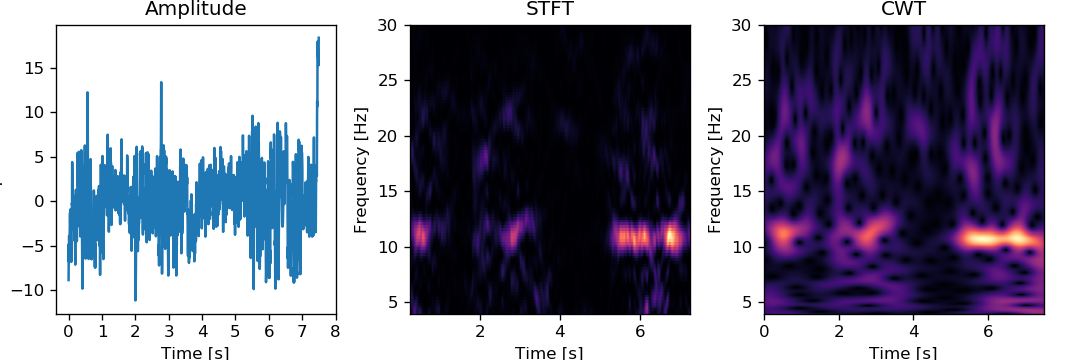

interactive(children=(IntSlider(value=0, description='trial_idx', max=399), IntSlider(value=0, description='ch…

In [187]:
%matplotlib notebook

# Loading output
pilot_idx = 1
mode = 'train' # {'train', 'test'}
path = '../../Datasets/BCI_IV_2b/formatted_raw/{}/{}{}.npz'.format(mode, mode, pilot_idx)
X,y = load_Xy(path, verbose=1)

# Plot signal
visual_analysis(X)

## 3. BCI Competition III a
[Back to top](#Sections)

**[BCI Competition III a](http://www.bbci.de/competition/iii/#download):**
- **MI paradigms:** Left - Right - Foot - Tongue
- **Subjects:**  3 pilots
- **Trials per session:** 240 trials (60 for each class)
- **Preprocessing:** Bandpass filter [1, 50] Hz + Notch filtering
- **Sample frequency:** 250 Hz
- **Electrodes:** 60 EEG
- **Useful timewindow:** 3s before cue - 4s after cue (full trial is 7s)


### Inspecting raw data

In [190]:
pilot_idx = 1
data_path = '../../Datasets/BCI_III_a/gdf/train/'
filepath = glob.glob(data_path + '/A{}*.gdf'.format(pilot_idx))[0]

raw = inspect_mne(filepath, plot_mne=False, load=False)

Inspecting {} ../../Datasets/BCI_III_a/gdf/train/A1T.gdf
Sampling frequency:  250.0
Number of channels:  60
Channel names:  ['#  1', '#  2', '#  3', '#  4', '#  5', '#  6', '#  7', '#  8', '#  9', '# 10', '# 11', '# 12', '# 13', '# 14', '# 15', '# 16', '# 17', '# 18', '# 19', '# 20', '# 21', '# 22', '# 23', '# 24', '# 25', '# 26', '# 27', '# 28', '# 29', '# 30', '# 31', '# 32', '# 33', '# 34', '# 35', '# 36', '# 37', '# 38', '# 39', '# 40', '# 41', '# 42', '# 43', '# 44', '# 45', '# 46', '# 47', '# 48', '# 49', '# 50', '# 51', '# 52', '# 53', '# 54', '# 55', '# 56', '# 57', '# 58', '# 59', '# 60']
	 1: 360.00
	 2: 360.00
	 3: 62.00
	 4: 360.00
	 5: 45.00
	 6: 45.00
	 7: 45.00
	 8: 45.00
	 9: 180.00
Beep (accustic stimulus, BCI experiment) 1
Cross on screen (BCI experiment) 2
Rejection of whole trial 3
Start of Trial, Trigger at t=0s 4
class1, Left hand - cue onset (BCI experiment) 5
class2, Right hand - cue onset (BCI experiment) 6
class3, Foot, towards Right - cue onset (BCI experimen

### Formatting data into .npz

In [ ]:
data_path = '../../Datasets/BCI_III_a/'
pre = 3.
post = 4.5
remove_ch = None #['EOG:ch01', 'EOG:ch02', 'EOG:ch03']
ch_list = None
label_idx = [5,6,7,8]
multisession = False

for mode in ['train', 'test']:
    formatter = FormatterGDF(root=data_path + 'gdf/', save_path=data_path,
                             labels_idx=label_idx, ch_list=ch_list, remove_ch=remove_ch, 
                             pre=pre, post=post, mode=mode, save=True, save_folder='formatted_raw', 
                             resample=False, preprocess=False, multisession=multisession, multithread=True,
                             save_as_trial=False)
    formatter.run()

### Inspecting formatted data

Loading  ../../Datasets/BCI_III_a/formatted_raw/train/train1.npz
X shape: (180, 60, 1875) - y shape: (180,)
Labels:  [0 1 2 3]
Label 0 - 45 trials
Label 1 - 45 trials
Label 2 - 45 trials
Label 3 - 45 trials


<IPython.core.display.Javascript object>


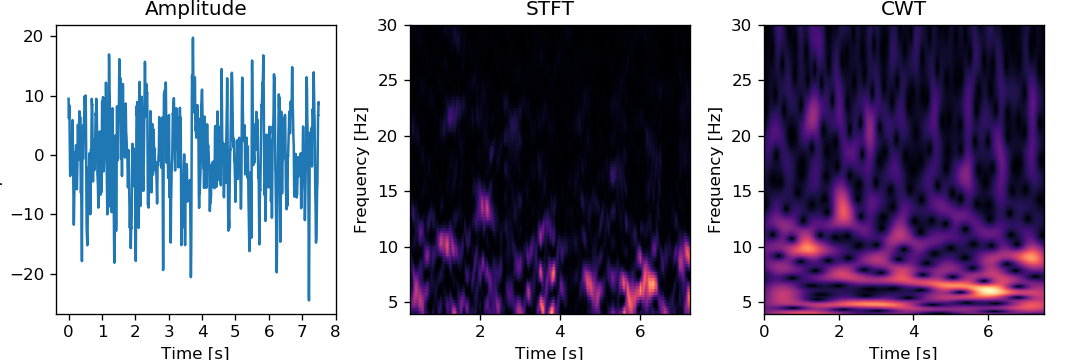

interactive(children=(IntSlider(value=0, description='trial_idx', max=179), IntSlider(value=0, description='ch…

In [191]:
%matplotlib notebook

# Loading output
pilot_idx = 1
path = '../../Datasets/BCI_III_a/formatted_raw/train/train{}.npz'.format(pilot_idx)
X,y = load_Xy(path, verbose=1)

# Plot signal
visual_analysis(X)

## 4. Our Competition Dataset
[Back to top](#Sections)

**Our Dataset:**
- **MI paradigms:** Left - Right - Both - Rest
- **Subjects:**  2 pilots
- **Trials per session:** ? trials (? for each class)
- **Preprocessing:** ?
- **Sample frequency:** 500 Hz
- **Electrodes:** 61 EEG (+ 3 EOG)
- **Useful timewindow for session 1 & 2:** 2s before cue - 3.5s after cue (full trial is 5.5s)
- **Useful timewindow for session 3+:** 2s after cue - 8s after cue (full trial is 6s)    
- **Encodings for Pilot 2:**
    - **Session 1:** [2,3,4,5] at 1000Hz no notch (left, right, both, rest) - Runs of identic labels - (60,60,45,48)
    - **Session 2:** [2,3,4,5] at 1000Hz no notch (left, right, both, rest) - Runs of random labels - (80,80,80,80)
    - **Session 3:** [3,4,5,6] at 500Hz no notch (rest, left, right, both) - Succession of rest/action labels - (60,20,20,20) in 2 subsessions
    - **Session 4:** idem with (30,10,10,10) trials in 2 subsessions
    - **Session 5:** idem 
    - **Session 6:** idem
    - **Session 7:** No labels?
    - **Session 8:** idem with (60,20,20,20) trials in 2 subsessions <br>


- **Encodings for Control 1:**
    - **Session 1:** [11,12,13] at 500 Hz (150,150,300)
    - **Session 2:** [2,3,4] at 1000 Hz (150,150,300)
    - **Session 3:** [2,3,4] at 1000 Hz (150,150,300)
    - **Session 4:** [2,3,4,5] at 1000 Hz (100,100,100,100) <br>


- **Encodings for Control 2:**
    - **Session 1:** ??? at 500 Hz -> No annotation
    - **Session 2:** [2,3,4] at 500 Hz (150,150,300)
    - **Session 3:** [2,3,4] at 500 Hz (100,100,200) <br>


- **Encodings for Control 3:**
    - **Session 1:** [2,3,4,5] at 1000 Hz (80,80,80,80) <br>
    
    
- **Encodings for Control 4:**
    - **Session 1:** [3,4,5,6] at 500 Hz 2x(60,20,20,20) - (rest, left, right, both)
    - **Session 2:** [3,4,5,6] at 500 Hz 2x(60,20,20,20)

### Inspecting raw data

Available files:  2
Inspecting  ../../Datasets/Controls/Control_4/Session_1/vhdr/EEG64_CY_exp_healthyp_23091901_01.vhdr


../utils/utils.py:33: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_gdf(path, preload=True) if filetype=='gdf' else mne.io.read_raw_brainvision(path, preload=True)


Sampling frequency:  500.0
Number of channels:  61
Channel names:  ['Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']
	 1: 1.00
	 2: 2.00
	 3: 60.00
	 4: 20.00
	 5: 20.00
	 6: 20.00
	 7: 2.00
	 8: 1.00
	 100: 1.00
	 99999: 1.00
New Segment/ 99999
Stimulus/S  1 1
Stimulus/S  2 2
Stimulus/S  3 3
Stimulus/S  4 4
Stimulus/S  5 5
Stimulus/S  6 6
Stimulus/S  7 7
Stimulus/S  8 8
Stimulus/S100 100


<IPython.core.display.Javascript object>


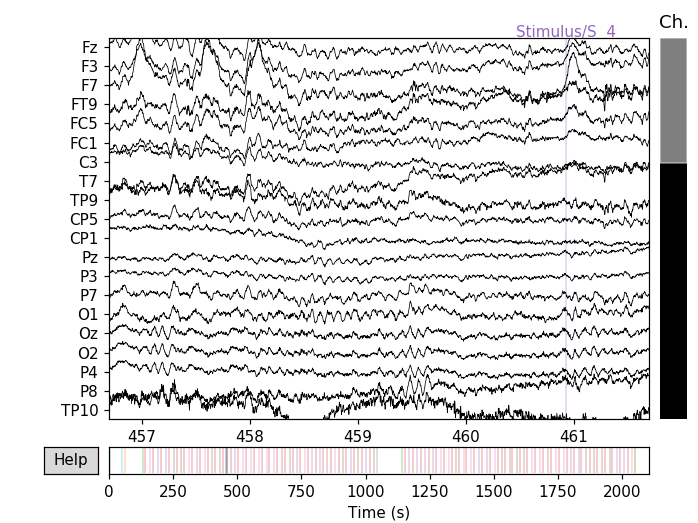

In [21]:
%matplotlib notebook

folder = 'Control' # {'Pilot', 'Control'}
pilot_idx = 4
session_idx = 1
file_idx = 0

data_path = '../../Datasets/{}s/{}_{}/Session_{}/vhdr/'.format(folder, folder, pilot_idx, session_idx)
filepaths = glob.glob(data_path + '*.vhdr')
print('Available files: ', len(filepaths))

raw = inspect_mne(filepaths[file_idx], plot_mne=True, load=False, filetype='vhdr')

### Formatting data into .npz

In [29]:
from formatting_functions.formatter import FormatterVHDR

# Put the data here: ../Datasets/Controls/Control_1/Session_1/vhdr/
# or here: ../Datasets/Pilots/Pilot_1/Session_1/vhdr/

control = True
pilot_idx = 4
root = '../../Datasets/Controls/' if control else '../../Datasets/Pilots/'

for session_idx in [3]: #[3,4,5,6,8]:
    if control:
        pre = 2.
        post = 3.5
        if pilot_idx==1 and session_idx==1:
            labels_idx = [11,12,13]
        elif (pilot_idx==1 and session_idx==4) or (pilot_idx==3 and session_idx==1):
            labels_idx = [2,3,4,5]
        elif pilot_idx==4:
            pre = -2.
            post = 8.
            labels_idx = [3,4,5,6]
        else:
            labels_idx = [2,3,4]
    else:
        labels_idx = [2,3,4,5] if session_idx<3 else [3,4,5,6]
        if session_idx<3:
            pre = 2.
            post = 3.5
        elif session_idx==3:
            pre = -2.
            post = 8.
        else:
            pre = -5.
            post = 11.

    ch_list = None #['FC3', 'FC4', 'C3','C4','CP3', 'CP4']
    remove_ch = ['Fp1', 'Fp2']

    formatter = FormatterVHDR(root, root, pilot_idx, session_idx, labels_idx, ch_list, remove_ch, 
                              pre, post, mode='train', save=True, save_folder='formatted_filt_250Hz',
                              preprocess=True, resample=True, control=control, save_as_trial=False)
    formatter.run()

List of EEG sessions:  ['../../Datasets/Controls/Control_4/Session_3/vhdr/EEG64_CY_exp_healthyp_25091903_01.vhdr', '../../Datasets/Controls/Control_4/Session_3/vhdr/EEG64_CY_exp_healthyp_25091903_02.vhdr']
Start formatting ../../Datasets/Controls/Control_4/Session_3/vhdr/EEG64_CY_exp_healthyp_25091903_01.vhdr...
Sub-session 1


../formatting_functions/formatter.py:394: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  preload=True);


Resampling from 500.0 to 250 Hz
Removing the following channels:  ['Fp1', 'Fp2']
Fixing numerical unstability
Filtering
Start formatting ../../Datasets/Controls/Control_4/Session_3/vhdr/EEG64_CY_exp_healthyp_25091903_02.vhdr...
Sub-session 2


../formatting_functions/formatter.py:394: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  preload=True);


Resampling from 500.0 to 250 Hz
Removing the following channels:  ['Fp1', 'Fp2']
Fixing numerical unstability
Filtering
Output labels [0 1 2 3]
Saving data of shape:  (240, 61, 1501)
Saved successfully ! 



### Inspecting formatted data

Loading  ../../Datasets/Controls/Control_4/Session_1/formatted_filt_250Hz/train/train1.npz
X shape: (240, 61, 1501) - y shape: (240,)
Labels:  [0 1 2 3]
Label 0 - 120 trials
Label 1 - 40 trials
Label 2 - 40 trials
Label 3 - 40 trials


<IPython.core.display.Javascript object>


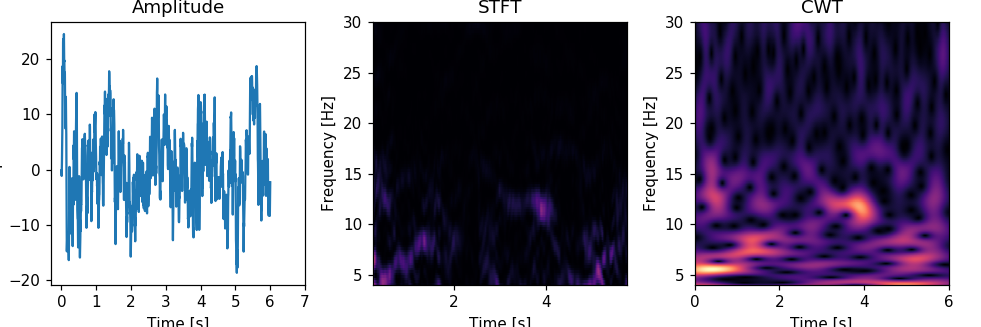

interactive(children=(IntSlider(value=0, description='trial_idx', max=239), IntSlider(value=0, description='ch…

In [27]:
%matplotlib notebook

# Loading output
folder = 'Control' # {'Pilot', 'Control'}
pilot_idx = 4
session_idx = 1
path = '../../Datasets/{}s/{}_{}/Session_{}/formatted_filt_250Hz/train/train1.npz'.format(folder, folder,
                                                                                          pilot_idx, session_idx)
X,y = load_Xy(path, verbose=1)

# Plot signal
visual_analysis(X)

### Action versus rest
Gather given label indexes under same label such that we end up with a binary dataset.

In [30]:
X = []
y = []

folder = 'Control' # {'Pilot', 'Control'}
pilot_idx = 4

for session_idx in [3]:
    data_path = '../../Datasets/{}s/{}_{}/Session_{}/'.format(folder, folder, pilot_idx, session_idx)
    filepaths = glob.glob(data_path + 'formatted_filt_250Hz/train/*.npz')
    savefolder_name = 'action_vs_rest_filt_250Hz'
    print(filepaths)

    # Load session dataset
    data = np.load(filepaths[0])
    X = data['X']
    y = data['y']

    # Print datastructure and labels count
    print(X.shape, y.shape)
    labels_list = np.unique(y)
    [ print('Label {} : {}'.format(label, len(np.where(y==label)[0]))) for label in labels_list ]

    # Gather labels
    gather_idx = [1,2,3]
    for label in gather_idx:
        y[y==label] = np.min(gather_idx)   

    # Print updated labels count
    labels_list = np.unique(y)
    [ print('Label {} : {}'.format(label, len(np.where(y==label)[0]))) for label in labels_list ]

    # Save new session dataset
    if not os.path.exists(data_path + savefolder_name):
        os.mkdir(data_path + savefolder_name)
        os.mkdir(data_path + savefolder_name + '/train')
    np.savez_compressed(data_path + savefolder_name + '/train/train1.npz', X=X, y=y)
    print('Saved successfully ! \n')

['../../Datasets/Controls/Control_4/Session_3/formatted_filt_250Hz/train/train1.npz']
(240, 61, 1501) (240,)
Label 0 : 120
Label 1 : 40
Label 2 : 40
Label 3 : 40
Label 0 : 120
Label 1 : 120
Saved successfully ! 



### Merging sessions

In [33]:
sessions_to_merge = np.array([3,4,5,6,8])
root = '../../Datasets/Pilots/Pilot_2/'
datafolder = '/action_vs_rest_filt_250Hz' # {'action_vs_rest_filt_250Hz', 'formatted_filt_250Hz'}
savefolder_name = 'Session_{}'.format(''.join(sessions_to_merge.astype(str)))

X = []
y = []
for session_idx in sessions_to_merge:
    data_path = root + 'Session_{}'.format(session_idx)
    filepaths = glob.glob(data_path + datafolder + '/train/*.npz')
    print(filepaths)

    # Load session dataset
    data = np.load(filepaths[0])
    X_sess = data['X']
    y_sess = data['y']
    
    X = X_sess if len(X)==0 else np.vstack([X, X_sess])
    y = y_sess if len(y)==0 else np.hstack([y, y_sess])

# Print updated labels count
print("X: ", X.shape, y.shape)
labels_list = np.unique(y)
[ print('Label {} : {}'.format(label, len(np.where(y==label)[0]))) for label in labels_list ]

# Save new session dataset
if not os.path.exists(root + savefolder_name):
    os.mkdir(root + savefolder_name)
if not os.path.exists(root + savefolder_name + datafolder):
    os.mkdir(root + savefolder_name + datafolder)
    os.mkdir(root + savefolder_name + datafolder + '/train')
np.savez_compressed(root + savefolder_name + datafolder + '/train/train1.npz', X=X, y=y)
print('Saved successfully ! \n')

['../../Datasets/Pilots/Pilot_2/Session_3/action_vs_rest_filt_250Hz/train/train1.npz']
['../../Datasets/Pilots/Pilot_2/Session_4/action_vs_rest_filt_250Hz/train/train1.npz']
['../../Datasets/Pilots/Pilot_2/Session_5/action_vs_rest_filt_250Hz/train/train1.npz']
['../../Datasets/Pilots/Pilot_2/Session_6/action_vs_rest_filt_250Hz/train/train1.npz']
['../../Datasets/Pilots/Pilot_2/Session_8/action_vs_rest_filt_250Hz/train/train1.npz']
X:  (840, 61, 1501) (840,)
Label 0 : 420
Label 1 : 420
Saved successfully ! 



### Merging all sessions and splitting into train/test sets

Put all formatted sessions in separate folder

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data_path = '../../Datasets/Competition/npz'
filepaths = glob.glob(data_path + '/*.npz')
print(filepaths)

# Load and merge all
X = []
y = []
for session_idx in range(len(filepaths)):
    data = np.load(filepaths[session_idx])
    X_sess = data['X']
    y_sess = data['y']
    
    X = X_sess if len(X)==0 else np.vstack([X, X_sess])
    y = y_sess if len(y)==0 else np.hstack([y, y_sess])
print("X: ", X.shape, y.shape)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0, shuffle=True, stratify=y)

# Save (create train and test folders first)
np.savez_compressed('../../Datasets/Competition/formatted_filt_250Hz/train/train1.npz', X=X_train, y=y_train)
np.savez_compressed('../../Datasets/Competition/formatted_filt_250Hz/test/test1.npz', X=X_test, y=y_test)
print('Successfully saved !')

['../../Datasets/Competition/npz/session1.npz', '../../Datasets/Competition/npz/session2.npz', '../../Datasets/Competition/npz/session3.npz', '../../Datasets/Competition/npz/session4.npz', '../../Datasets/Competition/npz/session5.npz']
X:  (1013, 61, 1500) (1013,)
Successfully saved !


### ERD/ERS visualization

Inspecting {} ../../Datasets/Pilots/Pilot_2/Session_5/vhdr/EEG64_CY_pilot_15071902_06.vhdr


../utils/utils.py:33: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_gdf(path, preload=True) if filetype=='gdf' else mne.io.read_raw_brainvision(path, preload=True)


Sampling frequency:  500.0
Number of channels:  61
Channel names:  ['F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'AF8', 'AF4', 'F2', 'FCz']
	 1: 1.00
	 2: 1.00
	 3: 30.00
	 4: 10.00
	 5: 10.00
	 6: 10.00
	 7: 1.00
	 8: 1.00
	 100: 1.00
	 10001: 1.00
	 99999: 1.00
Comment/Active Shielding: On 10001
New Segment/ 99999
Stimulus/S  1 1
Stimulus/S  2 2
Stimulus/S  3 3
Stimulus/S  4 4
Stimulus/S  5 5
Stimulus/S  6 6
Stimulus/S  7 7
Stimulus/S  8 8
Stimulus/S100 100


<IPython.core.display.Javascript object>


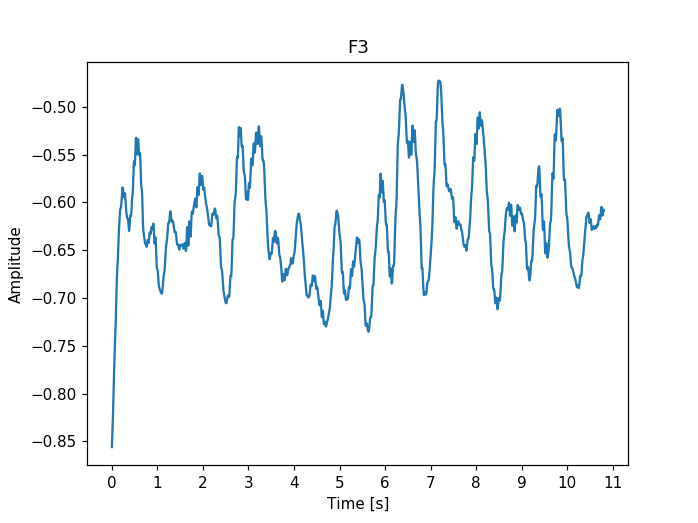

interactive(children=(IntSlider(value=0, description='channel_idx', max=60), Output()), _dom_classes=('widget-…

In [21]:
%matplotlib notebook
from preprocessing_functions.preproc_functions import filtering

# Getting channels name
path = '../../Datasets/{}s/{}_{}/Session_{}/vhdr/'.format(folder, folder, pilot_idx, session_idx)
filepaths = glob.glob(path + '*.vhdr')
raw = inspect_mne(filepaths[0], plot_mne=False, load=True, filetype='vhdr', verbose=0)

label_idx = 0
N = 50
X_filt = filtering(X[y==label_idx], f_low=8, f_high=12, f_order=2)
X_pow = X_filt*X_filt
X_mean_pow = np.mean(X_pow, axis=0)

# Running mean
X_mean_pow = np.array( [ np.convolve(X_mean_pow[channel_idx, :], np.ones((N,))/N, mode='valid')
                         for channel_idx in range(X.shape[1])])
baseline = np.mean(X_mean_pow[:, 250:500])
erds = (X_mean_pow - baseline) / baseline

fig, ax = plt.subplots()

@interact(channel_idx=(0, X.shape[1]-1))
def plot(channel_idx=0):
    ax.clear()
    temporal_plot(erds[channel_idx,:], fig=fig, title=raw.ch_names[channel_idx]);

## 5. HGD
[Back to top](#Sections)

In [4]:
from formatting_functions.formatter import FormatterMAT

ch_list = None #['FC3', 'FC4', 'C3','C4','CP3', 'CP4']
remove_ch = None

# Each trial is about 15s
data_path = '../../Datasets/HGD/'
pre = 1.
post = 4.
mode = 'train'
remove_ch = None
ch_list = None
label_idx = [1,2,3,4]

formatter = FormatterMAT(root=data_path + 'mat/', save_path=data_path,
                         labels_idx=label_idx, ch_list=ch_list, remove_ch=remove_ch, 
                         pre=pre, post=post, mode=mode, save=True, save_folder='formatted_raw', 
                         resample=False, preprocess=False, save_as_trial=False)
formatter.run()

['../../Datasets/HGD/mat/train/2.mat']
fs: 500.0 - n_samples: 3131420
Classes:  ['Right Hand', 'Left Hand', 'Rest', 'Feet']
(133, 3131420)
Finished labelling...
(133, 3131420) (3131420,)
Processing trials of class 1...
Processing trials of class 2...
Processing trials of class 3...
Processing trials of class 4...


ValueError: could not broadcast input array from shape (133,2500) into shape (133)

In [6]:
%matplotlib notebook

# Loading output
pilot_idx = 1
data = np.load('../../Datasets/HGD/formatted_raw/train/train{}.npz'.format(pilot_idx, session_idx, pilot_idx))
#data = np.load('../../Datasets/Controls/Control_{}/Session_{}/formatted_filt_250Hz/train/train{}.npz'.format(pilot_idx, session_idx, pilot_idx))
X = data['X']
y = data['y']

print(X.shape, y.shape)

(160, 133, 2500) (160,)
